# 1 - Importing the Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2 - Loading and Processing the Data

In [4]:
# reading rt_trips_DB_2018.txt as a dataframe
dftrips = pd.read_csv("dublin_bus_original_dataset/data/rt_trips_DB_2018.txt", sep=';')
# , parse_dates=[1, 14], infer_datetime_format=True

In [5]:
dftrips.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,07-FEB-18 00:00:00,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,"
1,DB,07-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,"
2,DB,07-FEB-18 00:00:00,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,"
3,DB,07-FEB-18 00:00:00,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,"
4,DB,07-FEB-18 00:00:00,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,"


In [17]:
# for each line and each direction we want the highest progress number in the dataset
# we are going to use 1 million consecutive rows in the middle of the file

dfmaxproglist = []
df1mil = pd.read_csv("dublin_bus_original_dataset/data/rt_leavetimes_DB_2018.txt", sep=';', usecols=[1, 2, 3], skiprows=range(1, 40000000), nrows=1000000)

for lineid in dftrips['LINEID'].unique():
    if lineid == '40E':
        print "Skipping 40E",
        continue
    if lineid == '16D':
        print "Skipping 16D",
        continue
    if lineid == '33E':
        print "Skipping 33E",
        continue
    if lineid == '41D':
        print "Skipping 41D",
        continue
    print lineid,
    for i in range(1, 3):
        if (lineid == '51X') and (i == 1):
            continue
        if (lineid == '46E') and (i == 1):
            continue
        if (lineid == '77X') and (i == 1):
            continue
        if (lineid == '41A') and (i == 1):
            continue
        if (lineid == '118') and (i == 1):
            continue
        if (lineid == '33E') and (i == 2):
            continue
        if (lineid == '68X') and (i == 1):
            continue
        if (lineid == '16D') and (i == 2):
            continue
    
        # first merge the df with trips to get the lineids for each row in the df
        df1mer = pd.merge(df1mil, dftrips[['DAYOFSERVICE', 'TRIPID', 'LINEID', 'DIRECTION']], on=['DAYOFSERVICE', 'TRIPID'])
            
        maxid = df1mer['PROGRNUMBER'].loc[(df1mer['LINEID'] == lineid) & (df1mer['DIRECTION'] == i)].idxmax()
        dfmaxproglist.append(df1mer[['LINEID', 'DIRECTION', 'PROGRNUMBER']].iloc[[maxid]])
        
df1mil2 = pd.read_csv("dublin_bus_original_dataset/data/rt_leavetimes_DB_2018.txt", sep=';', usecols=[1, 2, 3], skiprows=range(1, 112000000), nrows=1000000)

for lineid in ['40E', '16D', '33E', '41D']:
    print lineid,
    for i in range(1, 3):
        if (lineid == '16D') and (i == 2):
            continue
        if (lineid == '33E') and (i == 2):
            continue
        
        df1mer2 = pd.merge(df1mil2, dftrips[['DAYOFSERVICE', 'TRIPID', 'LINEID', 'DIRECTION']], on=['DAYOFSERVICE', 'TRIPID'])
        
        maxid2 = df1mer2['PROGRNUMBER'].loc[(df1mer2['LINEID'] == lineid) & (df1mer2['DIRECTION'] == i)].idxmax()
        dfmaxproglist.append(df1mer2[['LINEID', 'DIRECTION', 'PROGRNUMBER']].iloc[[maxid2]])
    
dfmaxprog = pd.concat(dfmaxproglist)

68 25B 45A 25A 14 77A 39 16 40D 27B 142 83 130 15 46A 33 7 39A 49 1 123 41 67X 59 9 40 239 76 84 53 185 151 13 15B 65B 29A 61 140 79A 38A 31 33B 69 44 42 67 184 238 145 17A 32 27A 17 27X 18 122 54A 66 150 56A 37 27 15A 65 11 47 79 83A 63 4 120 41C 70 84A 220 39X 32X 68A 84X 38 102 270 51X 33X 75 26 66A 31A 111 14C 114 76A 44B 161 7A 43 25 104 33A 16C 42D 31B 66X 31D 33D 41B 40B 7D 46E 38D 118 51D 15D 41A 25D 66B 38B 236 7B 41X 69X 68X 25X Skipping 40E 70D 116 77X Skipping 16D Skipping 33E Skipping 41D 40E 16D 33E 41D


In [18]:
dfmaxprog.head()

,LINEID,DIRECTION,PROGRNUMBER
450005,68,1,77
448734,68,2,74
33968,25B,1,40
34103,25B,2,40
399716,45A,1,61


In [21]:
# renaming PROGRNUMBER to MAXPROGRNUMBER
dfmaxprog = dfmaxprog.rename(columns={"PROGRNUMBER": "MAXPROGRNUMBER"})

In [22]:
dfmaxprog.head()

,LINEID,DIRECTION,MAXPROGRNUMBER
450005,68,1,77
448734,68,2,74
33968,25B,1,40
34103,25B,2,40
399716,45A,1,61


In [23]:
dfmaxprog.shape

(252, 3)

In [24]:
# saving this dataframe to a csv
dfmaxprog.to_csv("max-progress-numbers.csv", index=False)

In [50]:
dftrips.loc[dftrips['LINEID'] == '41D']

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
602276,DB,13-DEC-18 00:00:00,8173538,41D,41D_27,2,36600,33000,37370.0,NaN,BasDef,NaN,NaN,NaN,24-DEC-18 08:57:55,",3393051,"
603484,DB,13-DEC-18 00:00:00,8168184,41D,41D_26,1,31020,27000,NaN,27078.0,BasDef,NaN,NaN,NaN,24-DEC-18 08:57:55,",3392218,"
603485,DB,13-DEC-18 00:00:00,8173537,41D,41D_26,1,32220,28200,NaN,28645.0,BasDef,NaN,NaN,NaN,24-DEC-18 08:57:55,",3393050,"
608979,DB,13-DEC-18 00:00:00,8172053,41D,41D_27,2,65280,62400,NaN,62364.0,BasDef,NaN,NaN,NaN,24-DEC-18 08:57:55,",3392468,"
671890,DB,20-DEC-18 00:00:00,8463180,41D,41D_26,1,31020,27000,NaN,27128.0,BasDef,NaN,NaN,NaN,28-DEC-18 17:30:19,",3392218,"
675960,DB,20-DEC-18 00:00:00,8463179,41D,41D_26,1,32220,28200,31823.0,28593.0,BasDef,NaN,NaN,NaN,28-DEC-18 17:30:19,",3393050,"
675962,DB,20-DEC-18 00:00:00,8463181,41D,41D_27,2,36600,33000,37819.0,32973.0,BasDef,NaN,NaN,NaN,28-DEC-18 17:30:19,",3393051,"
678646,DB,17-DEC-18 00:00:00,8463180,41D,41D_26,1,31020,27000,NaN,27063.0,BasDef,NaN,NaN,NaN,27-DEC-18 08:21:23,",3392218,"
681398,DB,21-DEC-18 00:00:00,8463180,41D,41D_26,1,31020,27000,NaN,27042.0,BasDef,NaN,NaN,NaN,07-JAN-19 17:30:40,",3392218,"
739693,DB,19-DEC-18 00:00:00,8463181,41D,41D_27,2,36600,33000,NaN,NaN,BasDef,NaN,NaN,NaN,27-DEC-18 17:30:19,",3393051,"


In [13]:
df1mil = pd.read_csv("dublin_bus_original_dataset/data/rt_leavetimes_DB_2018.txt", sep=';', usecols=[1, 2, 3], skiprows=range(1, 50000000), nrows=1000000)
df1mil.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER
0,03-JUN-18 00:00:00,6852449,40
1,03-JUN-18 00:00:00,6852445,40
2,03-JUN-18 00:00:00,6858393,40
3,03-JUN-18 00:00:00,6852437,40
4,03-JUN-18 00:00:00,6856489,40


In [4]:
# selecting the tripid where lineid is 1
trip_1_id_list = dftrips['TRIPID'][dftrips['LINEID'] == '1'].tolist()

The following cell takes quite some time to run. It is worth keeping since it contains useful code to process the leavetimes file in chunks, however, I will avoid running it every time and instead load in the route 1 data locally.

In [5]:
# rt_leavetimes_DB_2018.txt too big, want to only load one route
# plan is to process the file in chunks and only add a route 1 to the dataframe I am loading in
# note that this cell takes around 5 minutes to run

#route1_df_list = []
#chunksize = 10 ** 6
#for chunk in pd.read_csv("dublin_bus_original_dataset/data/rt_leavetimes_DB_2018.txt", sep=';', chunksize=chunksize):
#    route1_df_list.append(chunk[chunk['TRIPID'].isin(trip_1_id_list)])

#dfroute1 = pd.concat(route1_df_list)

In [6]:
# saving the route 1 data to a local csv
#dfroute1.to_csv("route_1_leavetimes.csv", index=False)

In [4]:
# loading in the route 1 data from the local csv
dfroute1 = pd.read_csv("route_1_leavetimes.csv", parse_dates=[1, 16], infer_datetime_format=True)

In [5]:
dfroute1.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
1,DB,2018-01-01,5966674,12,119,54001,54001,54023,54023,2693267,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
2,DB,2018-01-01,5959105,12,119,60001,60001,59955,59955,2693263,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
3,DB,2018-01-01,5966888,12,119,58801,58801,58771,58771,2693284,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
4,DB,2018-01-01,5965960,12,119,56401,56401,56309,56323,2693209,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN


In [4]:
# list to store one trip for each lineid and direction
dftriplist = []

# looping over unique lineids
for lineid in dftrips['LINEID'].unique():
    for i in range(1, 3):
        # only want first instance that fits the description below
        dftriplist.append(dftrips[['LINEID', 'DIRECTION', 'DAYOFSERVICE', 'TRIPID']].loc[(dftrips['LINEID'] == lineid) & (dftrips['DIRECTION'] == i)].head(1))

dfsingletrip = pd.concat(dftriplist)

In [5]:
dfsingletrip.shape

(252, 4)

In [6]:
dfsingletrip['LINEID'].value_counts()

31D    2
18     2
120    2
59     2
122    2
123    2
161    2
220    2
11     2
13     2
15     2
14     2
17     2
16     2
25B    2
33X    2
84X    2
25A    2
17A    2
25X    2
45A    2
111    2
76A    2
33A    2
66B    2
66A    2
33B    2
151    2
150    2
39     2
      ..
70D    2
83     2
236    2
84     2
38A    2
38B    2
7D     2
38D    2
7B     2
7      2
41D    2
49     2
47     2
44     2
42     2
14C    2
43     2
41X    2
40     2
41     2
1      2
77A    2
77X    1
41A    1
51X    1
118    1
46E    1
33E    1
68X    1
16D    1
Name: LINEID, Length: 130, dtype: int64

Every route is represented, however, some routes only have one direction.

In [7]:
dfsingletrip['DAYOFSERVICE'].value_counts()

2018-02-18    46
2018-02-07    32
2018-03-11    27
2018-06-26    26
2018-09-28    22
2018-09-26    21
2018-04-11    15
2018-03-16    13
2018-10-10    12
2018-06-21    11
2018-10-11     8
2018-10-16     4
2018-12-13     3
2018-12-31     2
2018-06-22     2
2018-07-09     2
2018-04-10     2
2018-03-27     1
2018-04-12     1
2018-12-06     1
2018-09-20     1
Name: DAYOFSERVICE, dtype: int64

In [14]:
# process full leave times file in chunks, if dayofservice and tripid match a pair in the dataframe, pull out these stops
progstopslist = []
count = 1
single_tripidlist = dfsingletrip['TRIPID'].unique()

chunksize = 10 ** 6
for chunk in pd.read_csv("dublin_bus_original_dataset/data/rt_leavetimes_DB_2018.txt", sep=';', chunksize=chunksize):
    
    chunk = chunk[['DAYOFSERVICE', 'TRIPID', 'PROGRNUMBER', 'STOPPOINTID']]
    firstdf = chunk.loc[chunk['TRIPID'].isin(single_tripidlist)]
    progstopslist.append(firstdf)
    print count,
    count += 1

dfprogstops = pd.concat(progstopslist)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117


In [15]:
dfprogstops.shape

(68588, 4)

In [31]:
# in each dataframe, create a column for the combination of both dayofservice and tripid, then use this to filter the new df to
# get the rows we need
#dfsingletrip['DAYTRIPID'] = dfsingletrip['DAYOFSERVICE'].dt.strftime("%b %d %Y") + dfsingletrip['TRIPID'].astype('string')
#dfprogstops['DAYTRIPID'] = dfprogstops['DAYOFSERVICE'].astype('datetime64').dt.strftime("%b %d %Y") + dfprogstops['TRIPID'].astype('string')

In [16]:
dfsingletrip.head()

,LINEID,DIRECTION,DAYOFSERVICE,TRIPID
0,68,1,2018-02-07,6253783
594,68,2,2018-06-21,7023760
555,25B,1,2018-06-26,7109011
1,25B,2,2018-02-07,6262138
1658,45A,1,2018-06-26,7114255


In [17]:
dfprogstops.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID
11320689,18-FEB-18 00:00:00,6277493,1,4381
11320701,18-FEB-18 00:00:00,6277493,2,935
11320713,18-FEB-18 00:00:00,6277493,3,936
11320725,18-FEB-18 00:00:00,6277493,4,913
11320744,18-FEB-18 00:00:00,6277493,6,938


In [18]:
# changing dayofservice to datetime
dfprogstops['DAYOFSERVICE'] = dfprogstops['DAYOFSERVICE'].astype('datetime64')
dfprogstops.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID
11320689,2018-02-18,6277493,1,4381
11320701,2018-02-18,6277493,2,935
11320713,2018-02-18,6277493,3,936
11320725,2018-02-18,6277493,4,913
11320744,2018-02-18,6277493,6,938


In [19]:
dfmerged = pd.merge(dfsingletrip, dfprogstops, on=['DAYOFSERVICE', 'TRIPID'])

In [20]:
dfmerged.shape

(12266, 6)

In [28]:
dfmerged.tail(50)

,LINEID,DIRECTION,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID
12216,41D,1,2018-12-13,8168184,3,1172
12217,41D,1,2018-12-13,8168184,4,1173
12218,41D,1,2018-12-13,8168184,5,1174
12219,41D,1,2018-12-13,8168184,6,1175
12220,41D,1,2018-12-13,8168184,7,15
12221,41D,1,2018-12-13,8168184,8,17
12222,41D,1,2018-12-13,8168184,9,18
12223,41D,1,2018-12-13,8168184,10,19
12224,41D,1,2018-12-13,8168184,11,21
12225,41D,1,2018-12-13,8168184,12,7602


In [30]:
dfmerged['PROGRNUMBER'].value_counts()

11     250
13     250
14     249
12     248
7      248
9      247
10     246
16     246
17     245
15     245
6      245
8      244
18     244
5      244
4      243
21     240
20     240
19     239
22     237
3      234
23     234
2      232
24     231
25     229
1      228
26     226
29     219
27     218
28     218
30     214
      ... 
80      16
81      15
82      15
83      14
84      12
85       9
86       8
88       7
87       7
89       7
90       7
91       4
93       3
94       3
97       3
96       3
92       3
95       3
99       2
101      2
102      2
100      2
98       2
103      1
104      1
105      1
106      1
108      1
109      1
107      1
Name: PROGRNUMBER, Length: 109, dtype: int64

In [29]:
# saving merged dataframe to csv
dfmerged.to_csv("stopid-prognumbers.csv", index=False)

In [6]:
# reading in the historic weather data as a dataframe
dfw = pd.read_csv("ExtraDatasets/2018_historic_weather_3.csv")

In [7]:
# reading in the South Dublin traffic data as a dataframe
dftraffic = pd.read_csv("ExtraDatasets/SDCC_Traffic_Congestion_Saturation_Flow_Data_2018.csv")

In [8]:
# reading in the stops data as a dataframe
dfs = pd.read_csv("stops.csv")

In [9]:
dfs.head(10)

,stop_id,stop_name,stop_lat,stop_lon
0,8220DB000002,"Parnell Square West, stop 2",53.352244,-6.263723
1,8220DB000003,"Parnell Square West, stop 3",53.352309,-6.263811
2,8220DB000004,"Parnell Square West, stop 4",53.352575,-6.264175
3,8220DB000006,"Parnell Square West, stop 6",53.352749,-6.264454
4,8220DB000007,"Parnell Square West, stop 7",53.352841,-6.264570
5,8220DB000008,"Parnell Square West, stop 8",53.353272,-6.265184
6,8220DB000010,"Parnell Square West, stop 10",53.353392,-6.265389
7,8220DB000011,"St Joseph's Parade, stop 11",53.356815,-6.264679
8,8220DB000012,"Upper Dorset Street, stop 12",53.357108,-6.264382
9,8220DB000014,"Dorset Street Lower, stop 14",53.358531,-6.262777


# 3 - Data Visualisation and Preparation

## 3.1 - Identifying Data Quality Issues with Route 1 Dataset

In [12]:
# number of duplicate rows
dfroute1.duplicated().sum()

0

In [13]:
# counting null values
dfroute1.isna().sum()

DATASOURCE               0
DAYOFSERVICE             0
TRIPID                   0
PROGRNUMBER              0
STOPPOINTID              0
PLANNEDTIME_ARR          0
PLANNEDTIME_DEP          0
ACTUALTIME_ARR           0
ACTUALTIME_DEP           0
VEHICLEID                0
PASSENGERS         1336960
PASSENGERSIN       1336960
PASSENGERSOUT      1336960
DISTANCE           1336960
SUPPRESSED         1331691
JUSTIFICATIONID    1331691
LASTUPDATE               0
NOTE               1336960
dtype: int64

We can see from the above results that the columns PASSENGERS, PASSENGERSIN, PASSENGERSOUT, DISTANCE and NOTE only contain null values, therefore, they should be dropped when cleaning the data.<br>
Also worth noting is the fact that the SUPPRESSED and JUSTIFICATIONID columns contain around 5,000 entries, while there are over 1.3 million rows in this dataset. This column should definitely be considered for dropping when cleaning the data. It may be the case that any trips affected by these columns may need to be dropped too, which may involve dropping more than just the 5,000 or so rows which contain values for these columns.

Other than the columns which are entirely or almost entirely null values, the other columns contain no null values at all. Therefore, the cleaning process for these columns will almost certainly be focused on data integrity checks.

In [14]:
# counting distinct values in the DATASOURCE column in dfroute1
dfroute1['DATASOURCE'].value_counts()

DB    1336960
Name: DATASOURCE, dtype: int64

In [15]:
dfroute1['SUPPRESSED'].value_counts()

0.0    4065
1.0    1204
Name: SUPPRESSED, dtype: int64

In [16]:
dfroute1['JUSTIFICATIONID'].value_counts()

4.849814e+17    169
4.849814e+17    162
4.849814e+17    149
4.849814e+17    149
4.849814e+17    128
4.849814e+17    128
4.849814e+17    128
4.849814e+17    127
4.849814e+17    126
4.849814e+17    125
4.849814e+17    115
4.849814e+17    108
4.849814e+17     94
4.849814e+17     88
4.849814e+17     86
4.849814e+17     85
4.849814e+17     85
4.849814e+17     85
4.849814e+17     84
4.849814e+17     78
4.849814e+17     77
4.849814e+17     75
4.849814e+17     72
4.849814e+17     68
4.849814e+17     64
4.849814e+17     63
2.046420e+05     62
4.849814e+17     56
2.794880e+05     52
4.849814e+17     43
               ... 
4.849814e+17      1
4.849814e+17      1
4.849814e+17      1
4.849814e+17      1
4.849814e+17      1
4.849814e+17      1
4.849814e+17      1
4.849814e+17      1
4.849814e+17      1
4.849814e+17      1
4.849814e+17      1
4.849814e+17      1
4.849814e+17      1
4.849814e+17      1
4.849814e+17      1
4.849814e+17      1
4.849814e+17      1
4.849814e+17      1
4.849814e+17      1


In [17]:
# size of dfroute1
print("Number of rows:", len(dfroute1.index))

# number of unique trip IDs
print("Number of unique trip IDs:", len(dfroute1['TRIPID'].unique()))

('Number of rows:', 1336960)
('Number of unique trip IDs:', 10549)


In [18]:
# value counts for PROGRNUMBER
dfroute1['PROGRNUMBER'].value_counts()

19    33959
18    33958
17    33953
14    33948
15    33934
16    33928
13    33897
12    33891
11    33885
10    33879
20    33879
9     33862
8     33833
7     33800
21    33736
6     33689
5     33628
4     33612
1     33515
3     33322
2     33183
22    31620
23    29414
27    29153
28    29150
26    29141
29    29137
30    29137
25    29107
24    29105
32    29087
33    29086
34    29081
31    29079
35    29078
36    29074
37    29025
38    28928
39    28883
40    28840
42    28835
41    28811
43    14898
Name: PROGRNUMBER, dtype: int64

In [19]:
# printing data types for dfroute1 features
dfroute1.dtypes

DATASOURCE                 object
DAYOFSERVICE       datetime64[ns]
TRIPID                      int64
PROGRNUMBER                 int64
STOPPOINTID                 int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR              int64
ACTUALTIME_DEP              int64
VEHICLEID                   int64
PASSENGERS                float64
PASSENGERSIN              float64
PASSENGERSOUT             float64
DISTANCE                  float64
SUPPRESSED                float64
JUSTIFICATIONID           float64
LASTUPDATE         datetime64[ns]
NOTE                      float64
dtype: object

In [20]:
# changing the datatype of DAYOFSERVICE and LASTUPDATE to datetime64
#dfroute1['DAYOFSERVICE'] = dfroute1['DAYOFSERVICE'].astype('datetime64')
#dfroute1['LASTUPDATE'] = dfroute1['LASTUPDATE'].astype('datetime64')
#dfroute1.dtypes

/home/team14/miniconda2/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


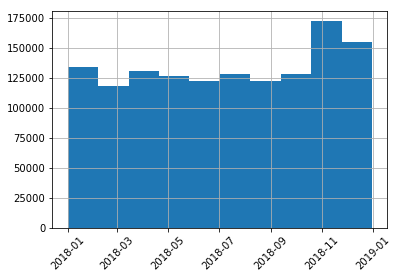

In [21]:
# plotting number of bus stops for route 1 over 2018
dfroute1['DAYOFSERVICE'].hist(xrot=45)

The above histogram appears to indicate that the bus made more stops in November and December than in other months of the year. This increase in the number of stops could be responsible for increased travel times for buses during these months. Also worthy of note is the fact that there no outliers in this feature, so this column would not require cleaning in that regard.

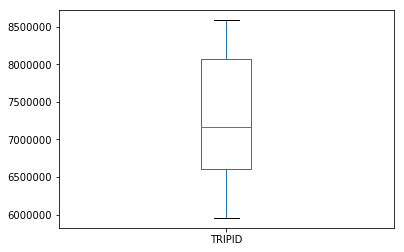

In [22]:
dfroute1['TRIPID'].plot(kind='box')

There appears to be no outliers in the TRIPID column, which indicates that the numbers themselves were entered correctly, however, there are other data integrity checks which must be carried out, for example, we must check that there are no rows which share a TRIPID and a PROGRNUMBER, which would indicate that that stop was entered more than once.

In [23]:
# checking if any tripids have duplicate PROGRNUMBER entries
dfroute1[['TRIPID', 'PROGRNUMBER']].duplicated().sum()

912681

In [24]:
dfroute1.loc[dfroute1['TRIPID'] == 8587368]

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
1302616,DB,2018-12-24,8587368,40,223,51896,51896,52531,52546,1932370,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-08 17:53:30,NaN
1302706,DB,2018-12-24,8587368,7,387,49458,49458,49556,49600,1932370,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-08 17:53:30,NaN
1302737,DB,2018-12-24,8587368,8,388,49511,49511,49659,49716,1932370,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-08 17:53:30,NaN
1302766,DB,2018-12-24,8587368,9,389,49532,49532,49733,49781,1932370,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-08 17:53:30,NaN
1302772,DB,2018-12-24,8587368,41,224,51928,51928,52575,52592,1932370,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-08 17:53:30,NaN
1302920,DB,2018-12-24,8587368,10,393,49576,49576,49824,49837,1932370,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-08 17:53:30,NaN
1302949,DB,2018-12-24,8587368,11,371,49642,49642,49863,49903,1932370,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-08 17:53:30,NaN
1303060,DB,2018-12-24,8587368,12,391,49701,49701,49936,49978,1932370,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-08 17:53:30,NaN
1303090,DB,2018-12-24,8587368,13,392,49807,49807,50017,50057,1932370,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-08 17:53:30,NaN
1303177,DB,2018-12-24,8587368,14,395,49958,49958,50113,50156,1932370,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-08 17:53:30,NaN


In [25]:
dfroute1['TRIPID'].value_counts()

7315903    817
7326745    817
7332015    817
7332124    817
7331692    817
7332017    817
7326747    817
7326743    817
7332120    817
7315907    817
7320038    817
7315905    817
7316976    817
7320034    817
7332122    815
7326741    806
7315898    798
7332014    798
7315906    798
7332016    798
7326744    798
7320033    798
7332123    798
7316977    798
7332121    798
7331693    798
7315902    797
7326748    797
7315901    796
7315904    785
          ... 
8060628     17
6417601     16
6237753     16
8458550     15
6110705     14
7765413     14
6296660     13
8061554     13
6601514     11
6288053     10
8147706      9
7768943      8
7506889      8
8061775      7
6292436      6
6598391      6
7016510      2
6110706      2
7159361      2
6244508      1
6289513      1
6617604      1
8160118      1
8139952      1
7103136      1
7656521      1
5958113      1
6744523      1
6880021      1
7500366      1
Name: TRIPID, Length: 10549, dtype: int64

In [26]:
dfroute1['PROGRNUMBER'].loc[dfroute1['TRIPID'] == 8060628].value_counts()

31    1
39    1
33    1
34    1
35    1
36    1
37    1
38    1
40    1
30    1
41    1
42    1
43    1
27    1
28    1
29    1
32    1
Name: PROGRNUMBER, dtype: int64

From looking at the column TRIPID and the enormous amount of rows with the same TRIPID and PROGRNUMBER entries it is clear that the column TRIPID is not unique to one single trip. However, trips with the same ID may occur on different days but will have the same planned departure and arrival times. Therefore, there is no data quality issue between these columns.

In [27]:
dfroute1['STOPPOINTID'].value_counts()

226     29423
399     17156
400     17153
398     17150
395     17137
397     17128
396     17124
319     17104
392     17086
391     17083
371     17076
393     17073
389     17057
388     17039
387     17018
278     16970
385     16943
7615    16937
383     16899
384     16896
381     16861
265     16812
271     16772
4451    16724
382     16686
353     16470
352     16469
355     16463
354     16461
340     16456
        ...  
1620    14858
220     14854
14      14850
221     14843
12      14840
222     14831
10      14818
223     14794
224     14789
225     14785
49      14629
48      14625
47      14623
7603    14621
44      14621
46      14621
4432    14619
45      14619
214     14616
119     14616
213     14611
51      14601
1642    14601
52      14592
1641    14589
231     14555
230     14541
227     14528
229     14407
228     14321
Name: STOPPOINTID, Length: 84, dtype: int64

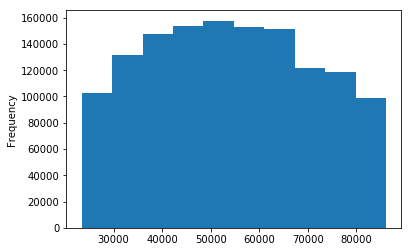

In [28]:
dfroute1['PLANNEDTIME_ARR'].plot(kind='hist')

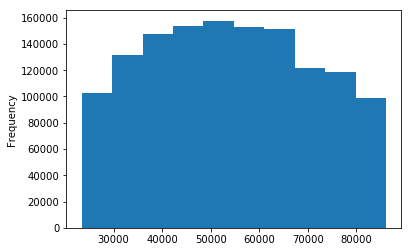

In [29]:
dfroute1['PLANNEDTIME_DEP'].plot(kind='hist')

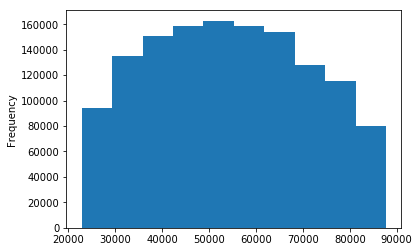

In [30]:
dfroute1['ACTUALTIME_ARR'].plot(kind='hist')

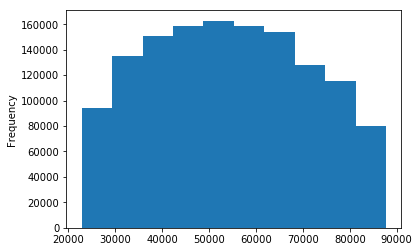

In [31]:
dfroute1['ACTUALTIME_ARR'].plot(kind='hist')

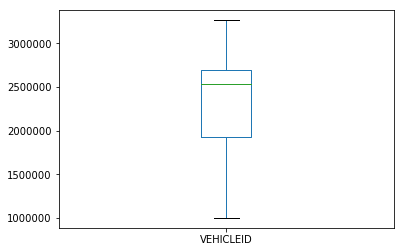

In [32]:
dfroute1['VEHICLEID'].plot(kind='box')

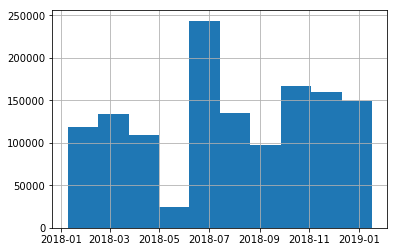

In [33]:
dfroute1['LASTUPDATE'].hist()

<b>Route 1 Data Quality Issues:</b><br><br>
DATASOURCE: All entries are 'DB', therefore no information can be gained from this column.<br><br>
DAYOFSERVICE: Slightly more stops happened in November/December. No clear issues. Column contain values in YYYY-MM-DD format.<br><br>
TRIPID: Many of the entries for TRIPID which have low frequency (less than 10) are suppressed. I may decide to remove all suppressed instances to remove trips which may cause problems when I begin predictive modelling.<br><br>
PROGRNUMBER: There do not appear to be any issues with this column just based off value counts. In terms of its integrity with the other columns it is important to note that some stops in a route may get skipped and therefore would not appear in the data.<br><br>
STOPPOINTID: The value counts for STOPPOINTID indicate that there were no outliers or incorrectly entered IDs. However, it is worth mentioning that the stop IDs will be matched with their latlng coordinates in the stops dataframe so we can use weather to predict the travel times.<br><br>
PLANNEDTIME_ARR, PLANNEDTIME_DEP, ACTUALTIME_ARR, ACTUALTIME_DEP: No data quality issues.<br><br>
VEHICLEID: No data quality issues.<br><br>
PASSENGERS, PASSENGERSIN, PASSENGERSOUT, DISTANCE: All null values.<br><br>
SUPPRESSED, JUSTIFICATIONID: Only around 5,000 entries out of 1.3 million rows. Seem to highly correlated with unfinished or late trips. Could justify removing these 5,000 rows and removing these columns when cleaning.<br><br>
LASTUPDATE: No data quality issues. However, I expect this column to be dropped while cleaning since it does not provide any useful information for predicting the travel times.<br><br>
NOTE: All null values.

## 3.2 - Identifying Data Quality Issues with Trips Dataset

In [34]:
dftrips.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2967409,"
1,DB,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2580260,"
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2448968,"
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",3094242,"
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2526331,"


In [35]:
# counting null values
dftrips.isna().sum()

DATASOURCE               0
DAYOFSERVICE             0
TRIPID                   0
LINEID                   0
ROUTEID                  0
DIRECTION                0
PLANNEDTIME_ARR          0
PLANNEDTIME_DEP          0
ACTUALTIME_ARR      137207
ACTUALTIME_DEP      164551
BASIN                    0
TENDERLOT          2182637
SUPPRESSED         2178304
JUSTIFICATIONID    2178307
LASTUPDATE               0
NOTE                     0
dtype: int64

In [36]:
dftrips['DATASOURCE'].value_counts()

DB    2182637
Name: DATASOURCE, dtype: int64

In [37]:
# converting DAYOFSERVICE and LASTUPDATE to datetime64 datatype
#dftrips['DAYOFSERVICE'] = dftrips['DAYOFSERVICE'].astype('datetime64')
#dftrips['LASTUPDATE'] = dftrips['LASTUPDATE'].astype('datetime64')
#dftrips.dtypes

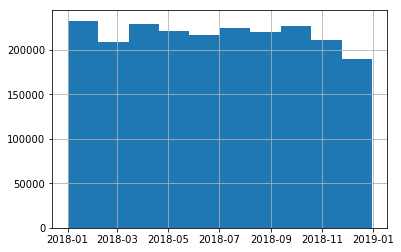

In [47]:
dftrips['DAYOFSERVICE'].hist()

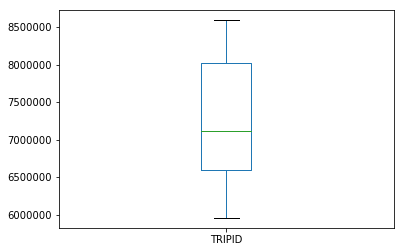

In [38]:
dftrips['TRIPID'].plot(kind='box')

In [39]:
dftrips['LINEID'].value_counts()

46A    76728
145    62730
15     58083
40     56974
39A    55301
130    54301
27     51023
123    48917
16     48628
9      43613
140    42560
13     40586
122    37842
14     37250
4      36293
1      34489
27B    34082
15B    33991
37     33505
83     33448
41     33117
77A    32852
29A    32608
120    32277
151    32230
15A    31579
150    30908
17A    30041
25A    29797
25B    29083
       ...  
161     1903
39X     1878
25D     1869
76A     1453
68A     1425
236     1306
40E     1305
51D     1201
25X     1156
14C      973
32X      957
27X      929
7D       773
15D      642
46E      487
69X      479
41A      462
116      440
38D      428
33D      421
42D      360
70D      360
31D      357
118      343
77X      243
68X      243
51X      238
16D       84
41D       36
33E       14
Name: LINEID, Length: 130, dtype: int64

In [40]:
dftrips['ROUTEID'].value_counts()

46A_74     37182
46A_67     35759
145_102    29259
15_17      28471
145_105    27964
40_31      27809
39A_43     27669
130_11     27516
40_27      27106
130_10     26785
39A_40     26402
27_19      24398
123_36     24232
16_24      24222
123_34     24006
27_17      23518
15_16      22730
140_19     22090
16_20      21439
9_7        21382
9_5        21308
140_21     19776
14_15      18567
14_16      17814
4_10       17773
37_15      16765
15B_60     16760
29A_15     16693
37_14      16226
15A_83     16043
           ...  
84X_59        40
7D_122        39
63_29         38
66X_100       34
66X_99        34
41X_120       34
41X_108       34
41X_118       34
25X_9         33
51X_63        33
41X_110       33
41X_117       33
44_38         30
44_35         29
41X_129       28
83_28         26
41D_26        18
41D_27        18
33E_74        14
41X_130       12
83_29         10
33B_60         9
41_24          9
41X_119        7
41_25          7
140_16         5
41B_58         5
14C_10        

In [41]:
dftrips['DIRECTION'].value_counts()

2    1100273
1    1082364
Name: DIRECTION, dtype: int64

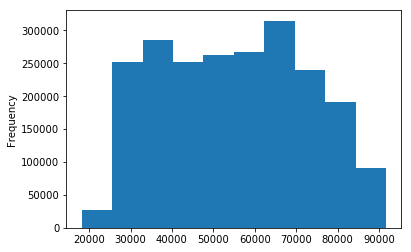

In [42]:
dftrips['PLANNEDTIME_ARR'].plot(kind='hist')

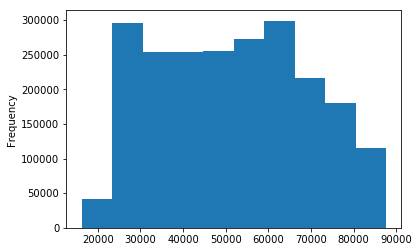

In [43]:
dftrips['PLANNEDTIME_DEP'].plot(kind='hist')

In [44]:
dftrips['BASIN'].value_counts()

BasDef    2182637
Name: BASIN, dtype: int64

In [49]:
dftrips[['ACTUALTIME_ARR', 'ACTUALTIME_DEP']].loc[dftrips['SUPPRESSED'] == 0.0]

,ACTUALTIME_ARR,ACTUALTIME_DEP
1783,NaN,65746.0
2363,NaN,68643.0
3485,77726.0,NaN
3873,NaN,53972.0
4353,NaN,63250.0
4614,63785.0,NaN
5664,66032.0,NaN
6047,53988.0,49294.0
6152,NaN,46784.0
7457,57603.0,57039.0


In [50]:
dftrips['JUSTIFICATIONID'].value_counts()

203708.0    19
203707.0    15
203715.0    14
204297.0    14
204254.0    10
204260.0    10
291650.0    10
204227.0     8
203630.0     8
204352.0     8
204349.0     8
203680.0     7
203712.0     7
279756.0     7
187478.0     7
291701.0     6
281465.0     6
203744.0     6
297898.0     5
204248.0     5
229253.0     5
204265.0     5
203724.0     5
242504.0     5
259203.0     4
190887.0     4
242494.0     4
204302.0     4
259202.0     4
204500.0     4
            ..
250369.0     1
250364.0     1
250362.0     1
250360.0     1
250570.0     1
250573.0     1
252057.0     1
250574.0     1
252056.0     1
252052.0     1
252049.0     1
250838.0     1
250831.0     1
250820.0     1
250818.0     1
250816.0     1
250813.0     1
250811.0     1
250809.0     1
250808.0     1
250807.0     1
250795.0     1
250793.0     1
250786.0     1
250784.0     1
250783.0     1
250782.0     1
250579.0     1
250576.0     1
177856.0     1
Name: JUSTIFICATIONID, Length: 3526, dtype: int64

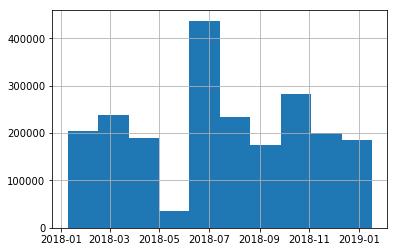

In [51]:
dftrips['LASTUPDATE'].hist()

In [52]:
dftrips['NOTE'].value_counts()

,2818442,            244
,2958504,            244
,2422939,            244
,1753939,            244
,2961300,            244
,2668674,            244
,2831705,            244
,2975110,            244
,2963494,            244
,2424575,            244
,1724114,            244
,2703274,            244
,2326480,            244
,2671918,            244
,2422401,            244
,1753677,            244
,2589784,            244
,2751999,            244
,2818386,            244
,2825720,            244
,1741154,            244
,1719150,            244
,2588466,            244
,1743017,            244
,2668673,            244
,1720962,            243
,1856033,            243
,2817436,            243
,2476411,            243
,2325312,            243
                    ... 
,1756016,1756016,      1
,3194405,              1
,2419274,2419274,      1
,3190588,              1
,3296639,3296639,      1
,3183880,              1
,2959515,2959515,      1
,3070931,3070931,      1
,3313053,3313053,      1


In [45]:
dftrips.head(50)

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2967409,"
1,DB,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2580260,"
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2448968,"
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",3094242,"
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2526331,"
5,DB,2018-02-07,6248240,77A,77A_28,2,41648,37200,42019.0,37538.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2966500,"
6,DB,2018-02-07,6251760,39,39_21,2,34768,28920,35709.0,28929.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2422850,"
7,DB,2018-02-07,6262909,16,16_20,1,43936,38880,43721.0,38955.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",3045261,"
8,DB,2018-02-07,6251147,40D,40D_102,1,33558,30600,34540.0,31185.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2837123,"
9,DB,2018-02-07,6249435,27B,27B_34,2,52682,49800,53281.0,49974.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2329338,"


<b>Trips Data Quality Issues:</b><br><br>
DATASOURCE: All entries are 'DB', therefore no information can be gained from this column.<br><br>
DAYOFSERVICE: No outliers or missing values.<br><br>
TRIPID: The boxplot for this column indicates that there are no outliers or clearly incorrectly entered numbers. There are also no missing values.<br><br>
LINEID: Some line IDs are used far less frequently than others, howerver, there does not appear to be any issues with this column. There are also no missing values.<br><br>
ROUTEID: Same as line ID.<br><br>
DIRECTION: Almost even split between 1 and 2. No missing values.<br><br>
PLANNEDTIME_ARR, PLANNEDTIME_DEP: No data quality issues with these columns.<br><br>
ACTUALTIME_ARR, ACTUALTIME_DEP: 137,000 and 164,000 missing values, respectively. Could decide to drop these rows or impute with either the predicted time or the predicted time plus the difference between the other actual and predicted times.<br><br>
BASIN: All values are 'BaseDef', so no infromation can be gained from this column.<br><br>
TENDERLOT: All null values.<br><br>
SUPPRESSED, JUSTIFICATIONID: Only contains 4,333 entries in suppressed, all of them 0. Of these entries, almost all of them had missing values in either actualtime_dep or actualtime_arr. Justification IDs correspond with values in suppressed.<br><br>
LASTUPDATE: No outliers or missing values in this column, however, don't think this column will be used at all.<br><br>
NOTE: Don't think this data will be useful for predictions.

## 3.3 - Identifying Data Quality Issues with 2018 Weather Dataset

In [3]:
dfw.shape

(8800, 25)

In [4]:
dfw.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1514764800,2018-01-01 00:00:00 +0000 UTC,0,Dublin,53.349805,-6.26031,4.15,-6.49,3.84,5.79,...,240,NaN,NaN,NaN,NaN,40,520,Rain,light intensity shower rain,09n
1,1514768400,2018-01-01 01:00:00 +0000 UTC,0,Dublin,53.349805,-6.26031,4.14,-5.79,3.65,5.86,...,240,NaN,NaN,NaN,NaN,75,520,Rain,light intensity shower rain,09n
2,1514772000,2018-01-01 02:00:00 +0000 UTC,0,Dublin,53.349805,-6.26031,4.61,-5.77,3.85,5.99,...,240,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
3,1514775600,2018-01-01 03:00:00 +0000 UTC,0,Dublin,53.349805,-6.26031,4.64,-5.73,4.00,6.14,...,240,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
4,1514779200,2018-01-01 04:00:00 +0000 UTC,0,Dublin,53.349805,-6.26031,5.04,-4.91,4.11,6.22,...,240,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n


In [5]:
dfw.isna().sum()

dt                        0
dt_iso                    0
timezone                  0
city_name                 0
lat                       0
lon                       0
temp                      0
feels_like                0
temp_min                  0
temp_max                  0
pressure                  0
sea_level              8800
grnd_level             8800
humidity                  0
wind_speed                0
wind_deg                  0
rain_1h                8734
rain_3h                8800
snow_1h                8800
snow_3h                8800
clouds_all                0
weather_id                0
weather_main              0
weather_description       0
weather_icon              0
dtype: int64

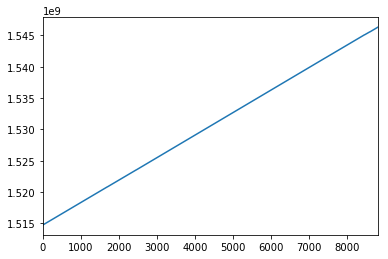

In [6]:
dfw['dt'].plot()

In [7]:
dfw['city_name'].value_counts()

Dublin    8800
Name: city_name, dtype: int64

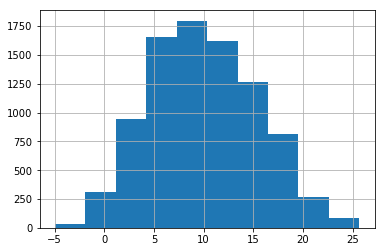

In [8]:
dfw['temp'].hist()

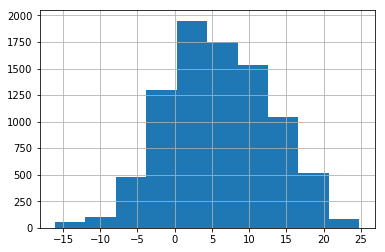

In [9]:
dfw['feels_like'].hist()

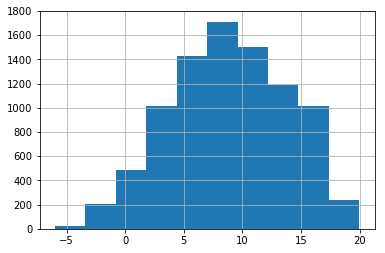

In [10]:
dfw['temp_min'].hist()

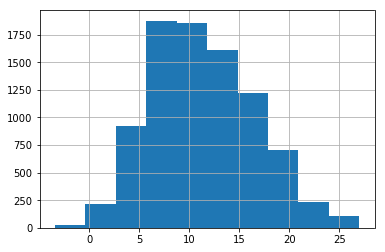

In [11]:
dfw['temp_max'].hist()

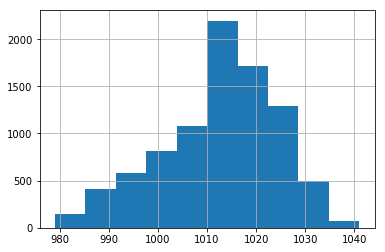

In [12]:
dfw['pressure'].hist()

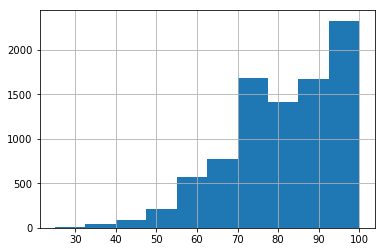

In [13]:
dfw['humidity'].hist()

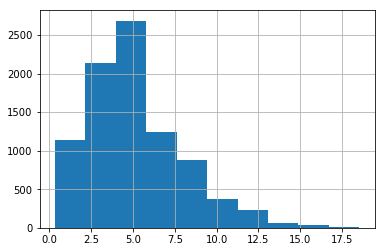

In [14]:
dfw['wind_speed'].hist()

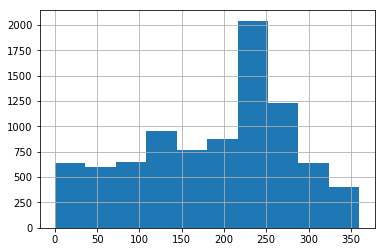

In [15]:
dfw['wind_deg'].hist()

In [16]:
dfw['rain_1h'].value_counts()

0.25    22
1.02    13
0.76     6
1.27     4
0.51     4
0.12     2
2.03     2
0.44     1
0.28     1
0.40     1
5.08     1
0.57     1
0.23     1
3.56     1
2.54     1
1.78     1
2.79     1
1.03     1
0.16     1
1.52     1
Name: rain_1h, dtype: int64

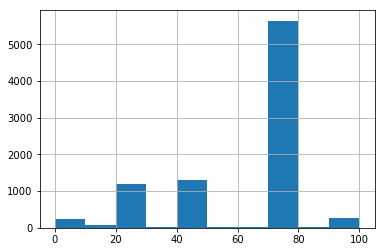

In [17]:
dfw['clouds_all'].hist()

In [18]:
dfw['weather_main'].value_counts()

Clouds     6760
Rain       1012
Drizzle     493
Clear       252
Snow        116
Fog          89
Mist         77
Smoke         1
Name: weather_main, dtype: int64

In [19]:
dfw['weather_description'].value_counts()

broken clouds                   4103
scattered clouds                1272
few clouds                      1199
light rain                       618
light intensity drizzle          268
sky is clear                     252
light intensity shower rain      225
light intensity drizzle rain     219
overcast clouds                  186
proximity shower rain            118
fog                               89
mist                              77
light shower snow                 66
moderate rain                     48
light snow                        30
 light shower sleet               11
snow                               7
drizzle                            4
shower rain                        2
rain and drizzle                   2
light rain and snow                1
smoke                              1
heavy intensity rain               1
shower snow                        1
Name: weather_description, dtype: int64

In [20]:
dfw['weather_icon'].value_counts()

04d    2310
04n    1979
03d     661
02n     621
03n     611
02d     578
09d     456
10n     390
09n     382
10d     277
01n     150
01d     102
50n      98
13n      72
50d      69
13d      44
Name: weather_icon, dtype: int64

<b>Data Quality Issues for Weather Data:</b><br>
(Unless column is listed, there are no issues)<br><br>
timezone, city_name, lat, lon: same values for all rows.<br><br>
sea_level, grnd_level: all missing values.<br><br>
rain_1h: 66 values out of a possible 880.<br><br>
rain_3h, snow_1h, snow_3h: all missing values.<br><br>
weather_main: only one entry for "smoke", many entries for other values. Might be difficult to convert this value if we are using a different API.

## 3.4 Identifying Data Quality Issues with South Dublin Traffic Dataset

In [22]:
dftraffic.head()

,site,day,date,start_time,end_time,flow,flow_pc,cong,cong_pc,dsat,dsat_pc,ObjectId
0,N01111A,MO,2018/01/01 00:00:00+00,2020/10/30 00:00:00+00,00:15,16,100,0,100,2,21,1
1,N01111A,MO,2018/01/01 00:00:00+00,2020/10/30 00:15:00+00,00:30,75,100,0,100,5,20,2
2,N01111A,MO,2018/01/01 00:00:00+00,2020/10/30 00:30:00+00,00:45,103,100,0,100,4,75,3
3,N01111A,MO,2018/01/01 00:00:00+00,2020/10/30 00:45:00+00,01:00,78,100,0,100,4,65,4
4,N01111A,MO,2018/01/01 00:00:00+00,2020/10/30 01:00:00+00,01:15,111,100,0,100,4,23,5


In [40]:
dftraffic.isna().sum()

site          0
day           0
date          0
start_time    0
end_time      0
flow          0
flow_pc       0
cong          0
cong_pc       0
dsat          0
dsat_pc       0
ObjectId      0
dtype: int64

In [23]:
dftraffic['site'].value_counts()

N01111R    32396
N01121E    32395
N01131A    32395
N01111D    32395
N01111A    32395
N01111C    32395
N01121G    32395
N01131B    32395
N01121Y    32395
N01121V    32395
N01121J    32395
N01121H    32395
N01111M    32395
N01121Z    32393
N01111Z    32393
N01121S    32392
N01111N    32392
N01131C     2794
Name: site, dtype: int64

In [24]:
dftraffic['day'].value_counts()

TH    80378
MO    79776
WE    79772
TU    78790
FR    78720
SA    78697
SU    77367
Name: day, dtype: int64

In [26]:
dftraffic['date'].value_counts()

2018/01/11 00:00:00+00    1728
2018/01/12 00:00:00+00    1728
2018/01/05 00:00:00+00    1728
2018/01/17 00:00:00+00    1728
2018/01/25 00:00:00+00    1728
2018/01/04 00:00:00+00    1728
2018/01/26 00:00:00+00    1728
2018/01/21 00:00:00+00    1728
2018/01/15 00:00:00+00    1728
2018/01/02 00:00:00+00    1728
2018/01/24 00:00:00+00    1728
2018/01/13 00:00:00+00    1728
2018/01/07 00:00:00+00    1728
2018/01/08 00:00:00+00    1728
2018/01/23 00:00:00+00    1728
2018/01/20 00:00:00+00    1728
2018/01/03 00:00:00+00    1728
2018/01/14 00:00:00+00    1728
2018/01/09 00:00:00+00    1728
2018/01/18 00:00:00+00    1728
2018/01/16 00:00:00+00    1728
2018/01/22 00:00:00+00    1728
2018/01/10 00:00:00+00    1728
2018/01/19 00:00:00+00    1728
2018/01/01 00:00:00+00    1728
2018/01/06 00:00:00+00    1728
2018/01/27 00:00:00+00    1705
2018/01/31 00:00:00+00    1702
2018/01/30 00:00:00+00    1702
2018/02/01 00:00:00+00    1658
                          ... 
2018/09/15 23:00:00+00    1632
2018/02/

In [27]:
dftraffic['start_time'].value_counts()

2020/10/30 18:00:00+00    5776
2020/10/30 09:45:00+00    5776
2020/10/30 10:00:00+00    5776
2020/10/30 00:00:00+00    5776
2020/10/30 17:00:00+00    5775
2020/10/30 20:30:00+00    5775
2020/10/30 17:15:00+00    5775
2020/10/30 22:45:00+00    5775
2020/10/30 18:45:00+00    5775
2020/10/30 22:15:00+00    5775
2020/10/30 22:30:00+00    5775
2020/10/30 23:00:00+00    5775
2020/10/30 18:15:00+00    5775
2020/10/30 19:15:00+00    5775
2020/10/30 17:45:00+00    5775
2020/10/30 21:45:00+00    5775
2020/10/30 20:15:00+00    5775
2020/10/30 23:15:00+00    5775
2020/10/30 20:45:00+00    5775
2020/10/30 21:00:00+00    5775
2020/10/30 19:00:00+00    5775
2020/10/30 19:30:00+00    5775
2020/10/30 10:15:00+00    5775
2020/10/30 23:45:00+00    5775
2020/10/30 20:00:00+00    5775
2020/10/30 21:15:00+00    5775
2020/10/30 19:45:00+00    5775
2020/10/30 18:30:00+00    5775
2020/10/30 21:30:00+00    5775
2020/10/30 22:00:00+00    5775
                          ... 
2020/10/30 00:45:00+00    5760
2020/10/

In [28]:
dftraffic['end_time'].value_counts()

18:15    5776
09:45    5776
10:15    5776
10:00    5776
19:30    5775
23:30    5775
22:30    5775
18:30    5775
20:45    5775
20:00    5775
21:30    5775
18:45    5775
17:15    5775
19:00    5775
18:00    5775
19:45    5775
20:30    5775
17:45    5775
22:15    5775
23:00    5775
21:00    5775
23:45    5775
21:45    5775
20:15    5775
19:15    5775
23:15    5775
10:30    5775
17:30    5775
22:45    5775
24:00    5775
         ... 
03:45    5760
02:45    5760
04:30    5760
05:15    5760
04:00    5760
02:15    5760
04:15    5760
01:00    5760
05:45    5760
05:00    5760
06:15    5760
00:15    5759
00:30    5759
09:30    5759
02:00    5756
01:45    5743
01:30    5743
01:15    5743
06:30    5742
09:15    5742
08:15    5741
09:00    5741
08:45    5741
08:00    5741
07:45    5741
06:45    5741
07:15    5741
07:30    5741
08:30    5741
07:00    5741
Name: end_time, Length: 96, dtype: int64

In [31]:
dftraffic['flow'].value_counts()

0       169898
4         4833
6         4429
3         4365
7         4219
9         4009
2         3935
10        3845
13        3686
8         3656
12        3626
11        3358
15        3143
16        3086
14        3065
5         2849
17        2833
19        2770
18        2610
20        2551
21        2501
23        2359
22        2294
24        2240
25        2216
26        2047
28        2018
29        1926
27        1904
30        1847
         ...  
2131         1
1337         1
1120         1
1139         1
1137         1
1342         1
1135         1
1134         1
1131         1
1130         1
1129         1
1869         1
2148         1
1121         1
2144         1
1889         1
1200         1
1378         1
1116         1
1891         1
1115         1
1626         1
1382         1
1113         1
1110         1
1391         1
1108         1
1392         1
1107         1
2421         1
Name: flow, Length: 1239, dtype: int64

In [32]:
dftraffic['flow_pc'].value_counts()

100    457748
0       95212
67        194
66         91
133        86
33         74
200        52
99         28
134        15
Name: flow_pc, dtype: int64

In [33]:
dftraffic['cong'].value_counts()

0     521640
1      13523
2       6521
3       3119
4       1789
5       1078
6        831
8        610
7        591
9        435
10       427
11       357
12       310
13       252
14       232
16       196
15       193
17       144
18       128
19       113
20       109
21        80
22        77
23        72
24        55
26        51
27        41
28        38
25        37
30        36
       ...  
54         6
56         6
58         6
52         6
51         6
38         6
53         4
61         4
65         4
55         4
67         2
86         2
83         2
81         2
78         2
93         2
89         2
60         2
66         1
69         1
70         1
71         1
73         1
77         1
62         1
84         1
85         1
59         1
88         1
68         1
Name: cong, Length: 82, dtype: int64

In [35]:
dftraffic['cong_pc'].value_counts()

100    457748
0       95212
67        194
66         91
133        86
33         74
200        52
99         28
134        15
Name: cong_pc, dtype: int64

In [36]:
dftraffic['dsat'].value_counts()

0       133297
1        18157
2        15908
3        15160
4        12607
5         9975
6         9047
7         8456
8         7492
13        7098
11        7074
10        6975
33        6922
9         6841
35        6805
34        6803
32        6735
36        6705
14        6536
37        6533
31        6530
30        6484
12        6454
38        6302
28        6239
15        6212
39        6192
29        6162
16        6065
40        5922
         ...  
290          1
286          1
263          1
284          1
267          1
268          1
269          1
276          1
245          1
309          1
310          1
311          1
349          1
553          1
340          1
274          1
336          1
222          1
332          1
649          1
227          1
1155         1
326          1
232          1
233          1
324          1
234          1
317          1
313          1
511          1
Name: dsat, Length: 378, dtype: int64

In [38]:
dftraffic['dsat_pc'].value_counts()

98     64604
0      60581
99     46811
97     34047
104    29519
100    28711
96     27635
101    22178
103    21420
102    20126
105    18329
107    17414
106    15391
95     12276
94      9065
93      7698
108     7112
92      5867
91      3472
109     2468
90      2113
89      1740
18      1729
27      1714
110     1530
9       1467
26      1466
32      1438
36      1329
45      1294
       ...  
207        2
205        2
204        2
198        2
192        2
196        2
195        2
214        2
185        2
183        2
136        2
189        2
190        1
145        1
211        1
133        1
134        1
141        1
143        1
208        1
152        1
146        1
156        1
163        1
169        1
178        1
179        1
182        1
184        1
153        1
Name: dsat_pc, Length: 167, dtype: int64

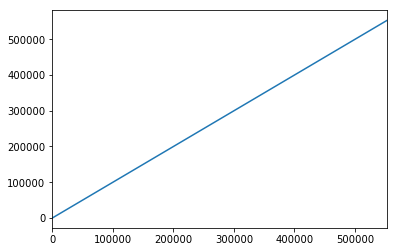

In [39]:
dftraffic['ObjectId'].plot()

<b>Traffic Data Quality Issues</b><br><br>
site: N01131C appears far less frequently than all other values.<br><br>
date: some dates appeared far less frequently than others.

## 3.5 Identifying Data Quality Issues with Stops Dataset

In [3]:
dfs.head(10)

,stop_id,stop_name,stop_lat,stop_lon
0,8220DB000002,"Parnell Square West, stop 2",53.352244,-6.263723
1,8220DB000003,"Parnell Square West, stop 3",53.352309,-6.263811
2,8220DB000004,"Parnell Square West, stop 4",53.352575,-6.264175
3,8220DB000006,"Parnell Square West, stop 6",53.352749,-6.264454
4,8220DB000007,"Parnell Square West, stop 7",53.352841,-6.264570
5,8220DB000008,"Parnell Square West, stop 8",53.353272,-6.265184
6,8220DB000010,"Parnell Square West, stop 10",53.353392,-6.265389
7,8220DB000011,"St Joseph's Parade, stop 11",53.356815,-6.264679
8,8220DB000012,"Upper Dorset Street, stop 12",53.357108,-6.264382
9,8220DB000014,"Dorset Street Lower, stop 14",53.358531,-6.262777


In [4]:
dfs.isna().sum()

stop_id      0
stop_name    0
stop_lat     0
stop_lon     0
dtype: int64

In [5]:
dfs['stop_id'].value_counts()

8240DB000717    1
8220DB001725    1
8260DB003964    1
8220DB004962    1
8220DB001729    1
8220DB001728    1
8260DB003962    1
8230DB002430    1
8240DB003746    1
8220DB000528    1
8220DB000529    1
8220DB000526    1
8240DB001214    1
8240DB001217    1
8240DB001216    1
8220DB000522    1
8240DB001210    1
8240DB001213    1
8240DB001212    1
8220DB001245    1
8240DB001672    1
8240DB007680    1
8240DB007681    1
8240DB007683    1
8250DB003164    1
8350DB004257    1
8220DB000345    1
8230DB007049    1
8230DB006014    1
8250DB003163    1
               ..
8220DB002186    1
8250DB003238    1
8250DB003239    1
8220DB001799    1
8220DB002774    1
8240DB003669    1
8240DB004465    1
8240DB004464    1
8240DB003662    1
8240DB003663    1
8240DB003660    1
8240DB003661    1
8250DB007553    1
8240DB003664    1
8220DB002187    1
8240DB003808    1
8220DB002184    1
8220DB002185    1
8220DB002182    1
8220DB002183    1
8220DB002181    1
8220DB002188    1
8220DB002189    1
8240DB003802    1
8220DB0012

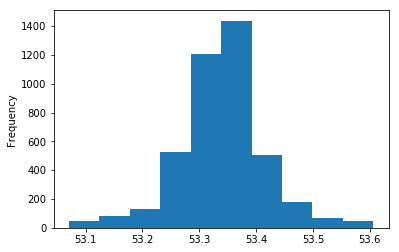

In [6]:
dfs['stop_lat'].plot(kind='hist')

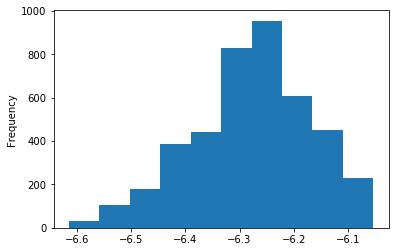

In [7]:
dfs['stop_lon'].plot(kind='hist')

<b>Stops Data Quality Issues:</b><br><br>

Stop name and stop number are in the same column.

# 4 - Cleaning the Data

## 4.1 - Cleaning Route 1 Dataset

<b>Route 1 Data Quality Plan:</b><br><br>
DATASOURCE: All entries the same, drop this column.<br><br>
DAYOFSERVICE: No issues. Leave column as is.<br><br>
TRIPID: Look at suppressed trips (either 0 or 1), see if they are completed trips. Remove trips which could cause problems for the predictive modelling. Leave as is for now.<br><br>
PROGRNUMBER: No issues. Leave as is.<br><br>
STOPPOINTID: No issues. Leave as is.<br><br>
PLANNEDTIME_ARR, PLANNEDTIME_DEP, ACTUALTIME_ARR, ACTUALTIME_DEP: No data quality issues. Leave as is.<br><br>
VEHICLEID: No data quality issues. Leave as is.<br><br>
PASSENGERS, PASSENGERSIN, PASSENGERSOUT, DISTANCE: All null values. Drop these columns.<br><br>
SUPPRESSED, JUSTIFICATIONID: Only around 5,000 entries out of 1.3 million rows. Seem to highly correlated with unfinished or late trips. Could justify removing these 5,000 rows and removing these columns when cleaning. See TRIPID strategy. Will change all null values to 0.0. Will remove justification id.<br><br>
LASTUPDATE: No data quality issues. However, I will drop this column as it does not provide any useful info for predicting travel times.<br><br>
NOTE: All null values. Drop this column.

In [4]:
dfroute1.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
1,DB,2018-01-01,5966674,12,119,54001,54001,54023,54023,2693267,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
2,DB,2018-01-01,5959105,12,119,60001,60001,59955,59955,2693263,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
3,DB,2018-01-01,5966888,12,119,58801,58801,58771,58771,2693284,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
4,DB,2018-01-01,5965960,12,119,56401,56401,56309,56323,2693209,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN


In [5]:
# dropping DATASOURCE, PASSENGERS, PASSENGERSIN, PASSENGERSOUT, DISTANCE, JUSTIFICATIONID, LASTUPDATE and NOTE columns
dfroute1 = dfroute1.drop(columns=['DATASOURCE', 'PASSENGERS', 'PASSENGERSIN', 'PASSENGERSOUT', 'DISTANCE', 'JUSTIFICATIONID', 'LASTUPDATE', 'NOTE'])
dfroute1.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,SUPPRESSED
0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,NaN
1,2018-01-01,5966674,12,119,54001,54001,54023,54023,2693267,NaN
2,2018-01-01,5959105,12,119,60001,60001,59955,59955,2693263,NaN
3,2018-01-01,5966888,12,119,58801,58801,58771,58771,2693284,NaN
4,2018-01-01,5965960,12,119,56401,56401,56309,56323,2693209,NaN


In [6]:
# filling in NaN values in SUPPRESSED with 0.0
#dfroute1['SUPPRESSED'] = dfroute1['SUPPRESSED'].fillna(0.0)
#dfroute1.head()

In [5]:
# getting mean difference between plannedtime_dep and actualtime_dep when suppressed value is there
(abs(dfroute1['PLANNEDTIME_DEP'].loc[(dfroute1['SUPPRESSED'] == 0.0) | (dfroute1['SUPPRESSED'] == 1.0)] - dfroute1['ACTUALTIME_DEP'].loc[(dfroute1['SUPPRESSED'] == 0.0) | (dfroute1['SUPPRESSED'] == 1.0)])).mean()

275.87360030366295

In [6]:
# getting mean difference between plannedtime_dep and actualtime_dep when suppressed value is not there
(abs(dfroute1['PLANNEDTIME_DEP'].loc[dfroute1['SUPPRESSED'].isna() == True] - dfroute1['ACTUALTIME_DEP'].loc[dfroute1['SUPPRESSED'].isna() == True])).mean()

232.26818458636424

In [7]:
# getting mean difference between plannedtime_arr and actualtime_arr when suppressed value is there
(abs(dfroute1['PLANNEDTIME_ARR'].loc[(dfroute1['SUPPRESSED'] == 0.0) | (dfroute1['SUPPRESSED'] == 1.0)] - dfroute1['ACTUALTIME_ARR'].loc[(dfroute1['SUPPRESSED'] == 0.0) | (dfroute1['SUPPRESSED'] == 1.0)])).mean()

260.1231732776618

In [8]:
# getting mean difference between plannedtime_arr and actualtime_arr when suppressed value is not there
(abs(dfroute1['PLANNEDTIME_ARR'].loc[dfroute1['SUPPRESSED'].isna() == True] - dfroute1['ACTUALTIME_ARR'].loc[dfroute1['SUPPRESSED'].isna() == True])).mean()

222.91921248998455

In [9]:
# getting mean difference between plannedtime_dep and actualtime_dep when suppressed value is 0.0
(abs(dfroute1['PLANNEDTIME_DEP'].loc[dfroute1['SUPPRESSED'] == 0.0] - dfroute1['ACTUALTIME_DEP'].loc[dfroute1['SUPPRESSED'] == 0.0])).mean()

222.16162361623617

In [10]:
# getting mean difference between plannedtime_dep and actualtime_dep when suppressed value is 1.0
(abs(dfroute1['PLANNEDTIME_DEP'].loc[dfroute1['SUPPRESSED'] == 1.0] - dfroute1['ACTUALTIME_DEP'].loc[dfroute1['SUPPRESSED'] == 1.0])).mean()

457.218438538206

In [11]:
# getting mean difference between plannedtime_arr and actualtime_arr when suppressed value is 0.0
(abs(dfroute1['PLANNEDTIME_ARR'].loc[dfroute1['SUPPRESSED'] == 0.0] - dfroute1['ACTUALTIME_ARR'].loc[dfroute1['SUPPRESSED'] == 0.0])).mean()

214.73480934809348

In [12]:
# getting mean difference between plannedtime_arr and actualtime_arr when suppressed value is 1.0
(abs(dfroute1['PLANNEDTIME_ARR'].loc[dfroute1['SUPPRESSED'] == 1.0] - dfroute1['ACTUALTIME_ARR'].loc[dfroute1['SUPPRESSED'] == 1.0])).mean()

413.36544850498336

Could keep track of trip ids, then remove trips with 1.0 for the suppressed flag. However, could also justify keeping these trips in the dataset since other factors about these trips could help to predict longer trips. I will leave these rows in the dataframe for now.

Were there any arrival times after the corresponding departure time?

In [7]:
dfroute1.loc[dfroute1['ACTUALTIME_ARR'] > dfroute1['ACTUALTIME_DEP']].shape

(0, 10)

There were not. Therefore we can drop the SUPPRESSED column.

In [8]:
# dropping SUPPRESSED
dfroute1 = dfroute1.drop(columns=['SUPPRESSED'])
dfroute1.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID
0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211
1,2018-01-01,5966674,12,119,54001,54001,54023,54023,2693267
2,2018-01-01,5959105,12,119,60001,60001,59955,59955,2693263
3,2018-01-01,5966888,12,119,58801,58801,58771,58771,2693284
4,2018-01-01,5965960,12,119,56401,56401,56309,56323,2693209


In [9]:
# saving the cleaned route 1 dataframe to a new csv
dfroute1.to_csv("route_1_leavetimes-cleaned.csv", index=False)

## 4.1.1 Cleaning Full Dublin Bus Dataset

Dropping columns.

In [10]:
# processing the file in chunks
chunksize = 10 ** 6
for chunk in pd.read_csv("dublin_bus_original_dataset/data/rt_leavetimes_DB_2018.txt", sep=';', chunksize=chunksize, usecols=['DAYOFSERVICE', 'TRIPID', 'PROGRNUMBER', 'STOPPOINTID', 'PLANNEDTIME_ARR', 'PLANNEDTIME_DEP', 'ACTUALTIME_ARR', 'ACTUALTIME_DEP', 'VEHICLEID']):
    chunk.to_csv('rt_leavetimes-cleaned.csv', mode='a', index=False)

## 4.2 - Cleaning Trips Dataset

<b>Trips Data Quality Plan:</b><br><br>
DATASOURCE: All entries are 'DB'. Drop this column.<br><br>
DAYOFSERVICE: No outliers or missing values. Leave as is.<br><br>
TRIPID: The boxplot for this column indicates that there are no outliers or clearly incorrectly entered numbers. There are also no missing values. Leave as is.<br><br>
LINEID: Some line IDs are used far less frequently than others, however, there does not appear to be any issues with this column. There are also no missing values. Leave as is.<br><br>
ROUTEID: Same as line ID. Leave as is.<br><br>
DIRECTION: Almost even split between 1 and 2. No missing values. Leave as is.<br><br>
PLANNEDTIME_ARR, PLANNEDTIME_DEP: No data quality issues with these columns. Leave as they are.<br><br>
ACTUALTIME_ARR, ACTUALTIME_DEP: 137,000 and 164,000 missing values, respectively. Will drop these rows. Will also drop any rows where the arrival time is before the departure time.<br><br>
BASIN: All values are 'BaseDef', so no infromation can be gained from this column. Drop this column.<br><br>
TENDERLOT: All null values. Drop this column.<br><br>
SUPPRESSED, JUSTIFICATIONID: Only contains 4,333 entries in suppressed, all of them 0. Of these entries, almost all of them had missing values in either actualtime_dep or actualtime_arr. Justification IDs correspond with values in suppressed. Remove trips which seem problematic (may be all of them which have a suppressed value).<br><br>
LASTUPDATE: No outliers or missing values in this column, however, don't think this column will be used at all.<br><br>
NOTE: Don't think this data will be useful for predictions. Drop this column.

In [5]:
dftrips.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2967409,"
1,DB,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2580260,"
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2448968,"
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",3094242,"
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2526331,"


In [6]:
dftrips.loc[(dftrips['ACTUALTIME_ARR'].isna() == True) & (dftrips['ACTUALTIME_DEP'].isna() == True) & (dftrips['LINEID'] == '1')]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
6304,DB,2018-03-10,6398753,1,1_37,1,48360,45600,NaN,NaN,BasDef,NaN,NaN,NaN,2018-03-19 14:54:09,",1940850,"
6356,DB,2018-03-10,6401011,1,1_40,2,61731,58800,NaN,NaN,BasDef,NaN,NaN,NaN,2018-03-19 14:54:09,",1946510,"
18023,DB,2018-03-16,6401968,1,1_38,1,24489,23400,NaN,NaN,BasDef,NaN,NaN,NaN,2018-03-26 12:55:43,",1944132,"
121371,DB,2018-09-19,8096011,1,1_40,2,39011,36000,NaN,NaN,BasDef,NaN,NaN,NaN,2018-10-30 16:37:58,",2852798,"
151278,DB,2018-03-03,6296652,1,1_37,1,51026,48000,NaN,NaN,BasDef,NaN,NaN,NaN,2018-03-12 10:07:09,",1946505,"
151280,DB,2018-03-03,6289977,1,1_40,2,44339,41400,NaN,NaN,BasDef,NaN,NaN,NaN,2018-03-12 10:07:09,",1940849,"
151333,DB,2018-03-03,6296653,1,1_40,2,54659,51600,NaN,NaN,BasDef,NaN,NaN,NaN,2018-03-12 10:07:09,",1946507,"
151336,DB,2018-03-03,6289520,1,1_40,2,81707,79200,NaN,NaN,BasDef,NaN,NaN,NaN,2018-03-12 10:07:09,",1946387,"
152564,DB,2018-03-03,6289515,1,1_37,1,63868,61200,NaN,NaN,BasDef,NaN,NaN,NaN,2018-03-12 10:07:09,",1946378,"
152578,DB,2018-03-03,6296660,1,1_37,1,79628,77400,NaN,NaN,BasDef,NaN,NaN,NaN,2018-03-12 10:07:09,",1946517,"


In [24]:
dfroute1.loc[dfroute1['TRIPID'] == 6401011]

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
232999,DB,2018-03-10,6401011,22,7615,60550,60550,61411,61411,2868400,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-19 14:54:09,NaN
234801,DB,2018-03-10,6401011,23,10,60571,60571,61418,61418,2868400,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-19 14:54:09,NaN
301325,DB,2018-03-24,6401011,26,15,60823,60823,60862,60903,2534794,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-10 15:08:12,NaN
301326,DB,2018-03-24,6401011,31,7602,61083,61083,61174,61222,2534794,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-10 15:08:12,NaN
301327,DB,2018-03-24,6401011,36,1620,61357,61357,61568,61584,2534794,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-10 15:08:12,NaN
301328,DB,2018-03-24,6401011,41,224,61630,61630,61870,61882,2534794,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-10 15:08:12,NaN
302338,DB,2018-03-24,6401011,4,383,58949,58949,59043,59043,2534794,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-10 15:08:12,NaN
302339,DB,2018-03-24,6401011,1,381,58800,58800,58882,58882,2534794,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-10 15:08:12,NaN
302340,DB,2018-03-24,6401011,2,382,58866,58866,58932,58967,2534794,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-10 15:08:12,NaN
302341,DB,2018-03-24,6401011,3,4451,58891,58891,58997,59010,2534794,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-10 15:08:12,NaN


In [37]:
# Dropping DATASOURCE, BASIN, TENDERLOT, LASTUPDATE, NOTE and JUSTIFICATIONID
dftrips = dftrips.drop(columns=['DATASOURCE', 'BASIN', 'TENDERLOT', 'LASTUPDATE', 'NOTE', 'JUSTIFICATIONID'])
dftrips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,NaN
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,NaN
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,NaN
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,NaN
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,NaN


Were there any departure times after the corresponding arrival time?

In [16]:
dftrips.loc[dftrips['ACTUALTIME_ARR'] < dftrips['ACTUALTIME_DEP']]

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,JUSTIFICATIONID
1619,2018-06-21,7029435,150,150_8,1,75653,73800,76232.0,83371.0,NaN,NaN
4473,2018-09-26,7766397,65,65_74,1,38044,34200,38852.0,42653.0,NaN,NaN
42164,2018-09-28,7761061,150,150_8,1,75510,73800,76397.0,76692.0,NaN,NaN
46421,2018-06-19,7021290,43,43_84,1,59845,56400,59314.0,59962.0,NaN,NaN
51585,2018-03-22,6391220,56A,56A_31,1,74509,71100,74755.0,75180.0,NaN,NaN
94387,2018-12-27,8585513,18,18_3,1,82077,79800,82138.0,82751.0,NaN,NaN
156532,2018-03-03,6283617,27A,27A_4,1,62103,60300,62058.0,62171.0,NaN,NaN
163309,2018-03-03,6284964,46A,46A_67,2,50126,45600,49684.0,51986.0,NaN,NaN
182398,2018-04-14,6625989,145,145_102,1,57904,53100,57848.0,58213.0,NaN,NaN
184192,2018-07-30,7330027,53,53_20,1,51810,50400,51996.0,54041.0,NaN,NaN


There are 103 of these instances. I shall look into the cause of these.

In [23]:
# looking at average difference between ACTUALTIME_DEP and ACTUALTIME_ARR when arrival time is before departure time
(abs(dftrips['ACTUALTIME_DEP'].loc[dftrips['ACTUALTIME_ARR'] < dftrips['ACTUALTIME_DEP']] - dftrips['ACTUALTIME_ARR'].loc[dftrips['ACTUALTIME_ARR'] < dftrips['ACTUALTIME_DEP']])).mean()

1740.9029126213593

In [24]:
# looking at average difference between ACTUALTIME_DEP and ACTUALTIME_ARR when departure time is after arrival time
(abs(dftrips['ACTUALTIME_ARR'].loc[dftrips['ACTUALTIME_ARR'] > dftrips['ACTUALTIME_DEP']] - dftrips['ACTUALTIME_DEP'].loc[dftrips['ACTUALTIME_ARR'] > dftrips['ACTUALTIME_DEP']])).mean()

3854.0634517954177

The above numbers indicate that this is not a simple matter of them being entered in the wrong order. Therefore, I will drop the affected rows.

In [25]:
dftrips.shape

(2182637, 11)

In [38]:
# dropping rows where actual arrival time is before actual departure time
dftrips = dftrips.drop(dftrips[dftrips['ACTUALTIME_ARR'] < dftrips['ACTUALTIME_DEP']].index)
dftrips.shape

(2182534, 10)

In [33]:
# looking at average difference between PLANNEDTIME_ARR and ACTUALTIME_ARR when SUPPRESSED is 0.0
(abs(dftrips['ACTUALTIME_ARR'].loc[dftrips['SUPPRESSED'] == 0.0] - dftrips['PLANNEDTIME_ARR'].loc[dftrips['SUPPRESSED'] == 0.0])).mean()

575.5208900999091

In [34]:
# looking at average difference between PLANNEDTIME_ARR and ACTUALTIME_ARR when SUPPRESSED is NaN
(abs(dftrips['ACTUALTIME_ARR'].loc[dftrips['SUPPRESSED'].isna() == True] - dftrips['PLANNEDTIME_ARR'].loc[dftrips['SUPPRESSED'].isna() == True])).mean()

507.9135006423983

I do not think these results can justify dropping the suppressed values. The trips with suppressed value 0 are on average 70 seconds later.

In [29]:
dftrips['SUPPRESSED'].value_counts()

0.0    4333
Name: SUPPRESSED, dtype: int64

In [39]:
# dropping the SUPPRESSED column
dftrips = dftrips.drop(columns=['SUPPRESSED'])
dftrips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0


Note: I still need to drop rows with missing values in ACTUALTIME_ARR and ACTUALTIME_DEP

In [41]:
dftrips.shape

(2182534, 9)

In [42]:
# dropping rows with missing values in ACTUALTIME_ARR and ACTUALTIME_DEP
dftrips = dftrips.drop(dftrips[dftrips['ACTUALTIME_ARR'].isna() == True].index)
dftrips = dftrips.drop(dftrips[dftrips['ACTUALTIME_DEP'].isna() == True].index)
dftrips.shape

(1893264, 9)

In [43]:
# saving cleaned dataframe to new csv
dftrips.to_csv("rt_trips_DB_2018-cleaned.csv", index=False)

## 3.3 - Cleaning Weather Dataset

In [26]:
dfw.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1514764800,2018-01-01 00:00:00 +0000 UTC,0,Dublin,53.349805,-6.26031,4.15,-6.49,3.84,5.79,...,240,NaN,NaN,NaN,NaN,40,520,Rain,light intensity shower rain,09n
1,1514768400,2018-01-01 01:00:00 +0000 UTC,0,Dublin,53.349805,-6.26031,4.14,-5.79,3.65,5.86,...,240,NaN,NaN,NaN,NaN,75,520,Rain,light intensity shower rain,09n
2,1514772000,2018-01-01 02:00:00 +0000 UTC,0,Dublin,53.349805,-6.26031,4.61,-5.77,3.85,5.99,...,240,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
3,1514775600,2018-01-01 03:00:00 +0000 UTC,0,Dublin,53.349805,-6.26031,4.64,-5.73,4.00,6.14,...,240,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
4,1514779200,2018-01-01 04:00:00 +0000 UTC,0,Dublin,53.349805,-6.26031,5.04,-4.91,4.11,6.22,...,240,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n


<b>Weather Data Quality Plan:</b><br><br>
(Unless column is listed, there are no issues and the column should be left as is)<br><br>
timezone, city_name, lat, lon: same values for all rows. Will delete these rows.<br><br>
sea_level, grnd_level: All missing values, delete these columns.<br><br>
rain_1h: 66 values out of a possible 880. Delete this column.<br><br>
rain_3h, snow_1h, snow_3h: All missing values, delete these columns.<br><br>
weather_main: only one entry for "smoke", many entries for other values. Might be difficult to convert this value if we are using a different API. However, will leave this column as it is for now.

In [14]:
dfw = dfw.drop(columns=['timezone', 'city_name', 'lat', 'lon', 'sea_level', 'grnd_level', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h'])
dfw.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1514764800,2018-01-01 00:00:00 +0000 UTC,4.15,-6.49,3.84,5.79,990,87,12.86,240,40,520,Rain,light intensity shower rain,09n
1,1514768400,2018-01-01 01:00:00 +0000 UTC,4.14,-5.79,3.65,5.86,991,87,11.83,240,75,520,Rain,light intensity shower rain,09n
2,1514772000,2018-01-01 02:00:00 +0000 UTC,4.61,-5.77,3.85,5.99,990,81,12.35,240,40,802,Clouds,scattered clouds,03n
3,1514775600,2018-01-01 03:00:00 +0000 UTC,4.64,-5.73,4.00,6.14,990,81,12.35,240,40,802,Clouds,scattered clouds,03n
4,1514779200,2018-01-01 04:00:00 +0000 UTC,5.04,-4.91,4.11,6.22,990,81,11.83,240,40,802,Clouds,scattered clouds,03n


In [15]:
# saving cleaned dataframe to new csv
dfw.to_csv("2018_historic_weather_3-cleaned.csv", index=False)

## 3.4 - Cleaning South Dublin Traffic Dataset

In [8]:
dftraffic.head()

,site,day,date,start_time,end_time,flow,flow_pc,cong,cong_pc,dsat,dsat_pc,ObjectId
0,N01111A,MO,2018/01/01 00:00:00+00,2020/10/30 00:00:00+00,00:15,16,100,0,100,2,21,1
1,N01111A,MO,2018/01/01 00:00:00+00,2020/10/30 00:15:00+00,00:30,75,100,0,100,5,20,2
2,N01111A,MO,2018/01/01 00:00:00+00,2020/10/30 00:30:00+00,00:45,103,100,0,100,4,75,3
3,N01111A,MO,2018/01/01 00:00:00+00,2020/10/30 00:45:00+00,01:00,78,100,0,100,4,65,4
4,N01111A,MO,2018/01/01 00:00:00+00,2020/10/30 01:00:00+00,01:15,111,100,0,100,4,23,5


<b>Traffic Data Quality Plan:</b><br><br>
No cleaning necessary, we can leave this dataset as it is.

## 3.5 - Cleaning Stops Dataset

In [16]:
dfs.head()

,stop_id,stop_name,stop_lat,stop_lon
0,8220DB000002,"Parnell Square West, stop 2",53.352244,-6.263723
1,8220DB000003,"Parnell Square West, stop 3",53.352309,-6.263811
2,8220DB000004,"Parnell Square West, stop 4",53.352575,-6.264175
3,8220DB000006,"Parnell Square West, stop 6",53.352749,-6.264454
4,8220DB000007,"Parnell Square West, stop 7",53.352841,-6.264570


<b>Stops Data Quality Plan:</b><br><br>

Add new column containing all stop numbers.

In [18]:
dfs['stop_number'] = dfs['stop_name'].str.extract('(\d+)')
dfs.head()

,stop_id,stop_name,stop_lat,stop_lon,stop_number
0,8220DB000002,"Parnell Square West, stop 2",53.352244,-6.263723,2
1,8220DB000003,"Parnell Square West, stop 3",53.352309,-6.263811,3
2,8220DB000004,"Parnell Square West, stop 4",53.352575,-6.264175,4
3,8220DB000006,"Parnell Square West, stop 6",53.352749,-6.264454,6
4,8220DB000007,"Parnell Square West, stop 7",53.352841,-6.264570,7


In [19]:
# saving cleaned dataframe to new csv
dfs.to_csv("stops-cleaned.csv", index=False)